## Why do we want to use HSV rather than RGB for example for image segmentation?

The simplest answer for this question is that **you can separate colours much easier with HSV than with RGB**.

But, what does this even mean?

HSV gives us:
- Hue = Actual colour information, e.g., red, green, blue... On the other hand, RGB shows us colours as mixtures of Red, Green, Blue channels
- Saturation = How vivid or intense the colour is
- Values = Brightness of the pixel

For example, if you want to segment out all the red objects in an image, it's much easier to do so in HSV space because all the blue pixels will have similar hue values.

Check out the figure below.
- x-axis: Hue[0, 180]
- y-axis: Saturation[0,255]
- Value is 255 in this graph

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, measure
from scipy.ndimage import median_filter
from skimage.color import rgb2hsv
from google.colab import drive
import os
import tensorflow as tf

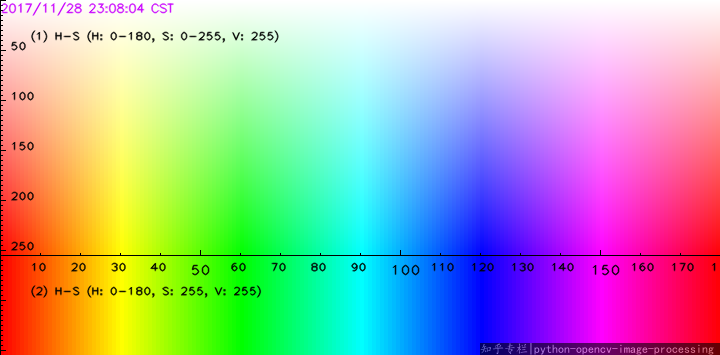

In [ ]:
Image(filename='hsv_color.png')

To clarify my point, I'll segment strawberries from a fruits image.

This process can be easily done without using U-Net or other kinds of CNN.

### Image Segmentation of Strawberries

### This is the original image

height x width x RGB (647, 1036, 3)


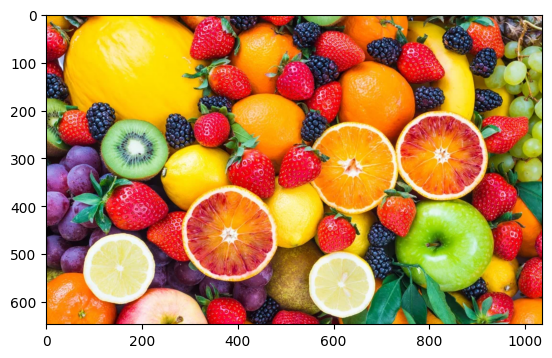

In [ ]:
img = io.imread('fruits.png')
print(f"height x width x RGB {img.shape}")
plt.imshow(img)

### Plot Hue, Saturation, Value of the original image

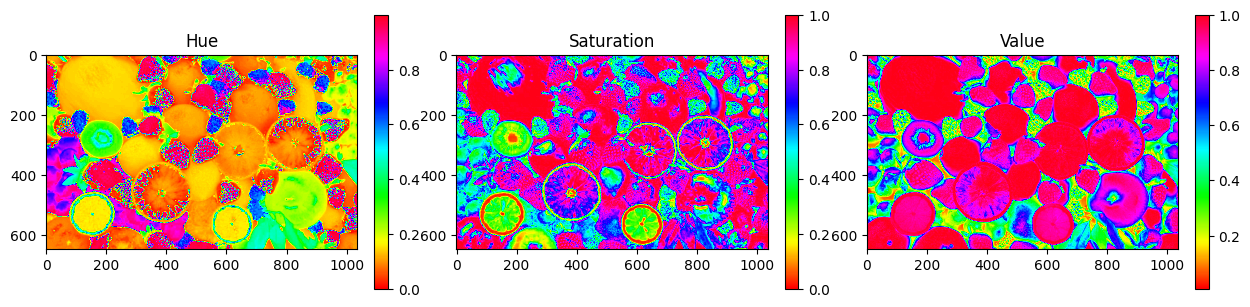

In [ ]:
# show hsv
fruits = io.imread('fruits.png')
fruits_hsv = rgb2hsv(fruits)
fig, ax = plt.subplots(1, 3, figsize=(15,12))
im = ax[0].imshow(fruits_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
fig.colorbar(im, ax=ax[0], fraction=0.04)

im = ax[1].imshow(fruits_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
fig.colorbar(im, ax=ax[1], fraction=0.04)

im = ax[2].imshow(fruits_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value')
fig.colorbar(im, ax=ax[2], fraction=0.04)

### Segment Strawberries
- 1. Create masks (e.g., **mask for Hue** and/or **mask for Saturation** and/or **mask for Value**)
- 2. Combine the masks as a median_filter
- 3. Apply the filter

Text(0.5, 1.0, 'Segmented Image')

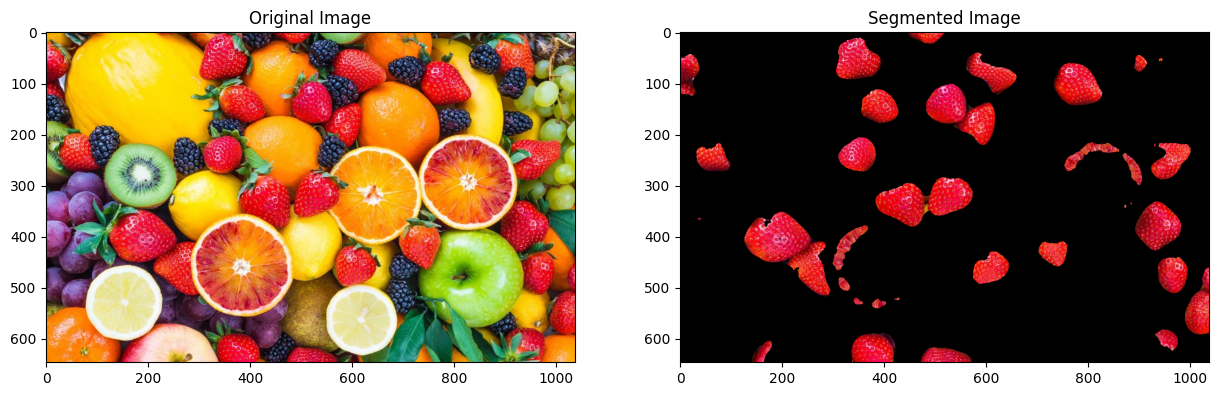

In [ ]:
fruits = io.imread('fruits.png')
fruits_hsv = rgb2hsv(fruits)
fig, ax = plt.subplots(1, 2, figsize=(15,12))
# create hsv mask
lower_hmask = fruits_hsv[:,:,0] > 0.9
upper_hmask = fruits_hsv[:,:,0] < 0.03
smask= fruits_hsv[:,:,1] > 0.7
mask_1 = median_filter((lower_hmask+upper_hmask)*smask, size = 25)

# segment RGB image
red = fruits[:,:,0]*mask_1
green = fruits[:,:,1]*mask_1
blue = fruits[:,:,2]*mask_1
strawberry_masked = np.dstack((red,green,blue))

ax[0].imshow(fruits)
ax[0].set_title('Original Image')
ax[1].imshow(strawberry_masked)
ax[1].set_title('Segmented Image')

In [2]:
drive.mount('/content/drive')
#! ls
%cd drive/MyDrive/MachineLearning
%cd Geospatial_ML
! ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
architecture.drawio  evaluation   jaccard_index  prepare_data  requirements.txt
data_exploration     experiments  models	 README.md


In [3]:
data_directory = "../data_colab/256_200"

y_train  = np.load(os.path.join(data_directory, '2022_06_20.npz'))['y_mask']
x_train  = np.load(os.path.join(data_directory, '2022_06_20.npz'))['x_input']

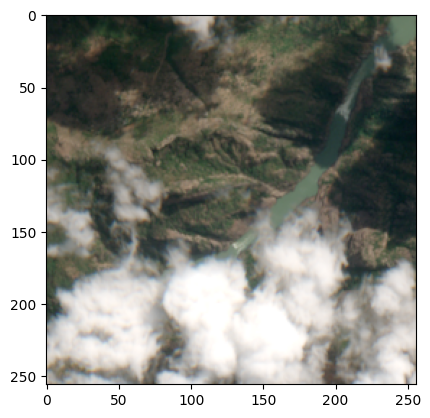

In [4]:
plt.imshow(tf.keras.utils.array_to_img(x_train[2][...,:4]))

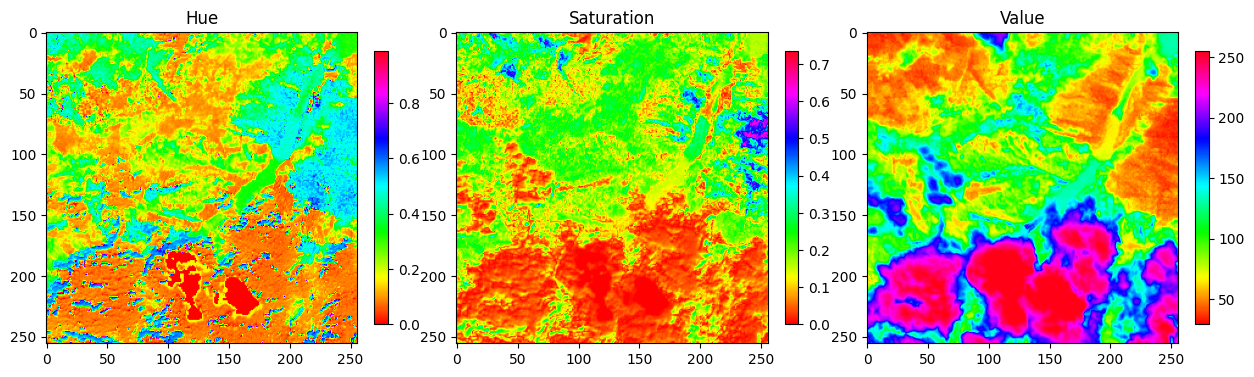

In [12]:
# show hsv
satellite = x_train[2][...,:3]
satellite_hsv = rgb2hsv(satellite)
fig, ax = plt.subplots(1, 3, figsize=(15,12))
im = ax[0].imshow(satellite_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
fig.colorbar(im, ax=ax[0], fraction=0.04)

im = ax[1].imshow(satellite_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
fig.colorbar(im, ax=ax[1], fraction=0.04)

im = ax[2].imshow(satellite_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value')
fig.colorbar(im, ax=ax[2], fraction=0.04)

### Flag out clouds

Text(0.5, 1.0, 'Clud Flagged out Image')

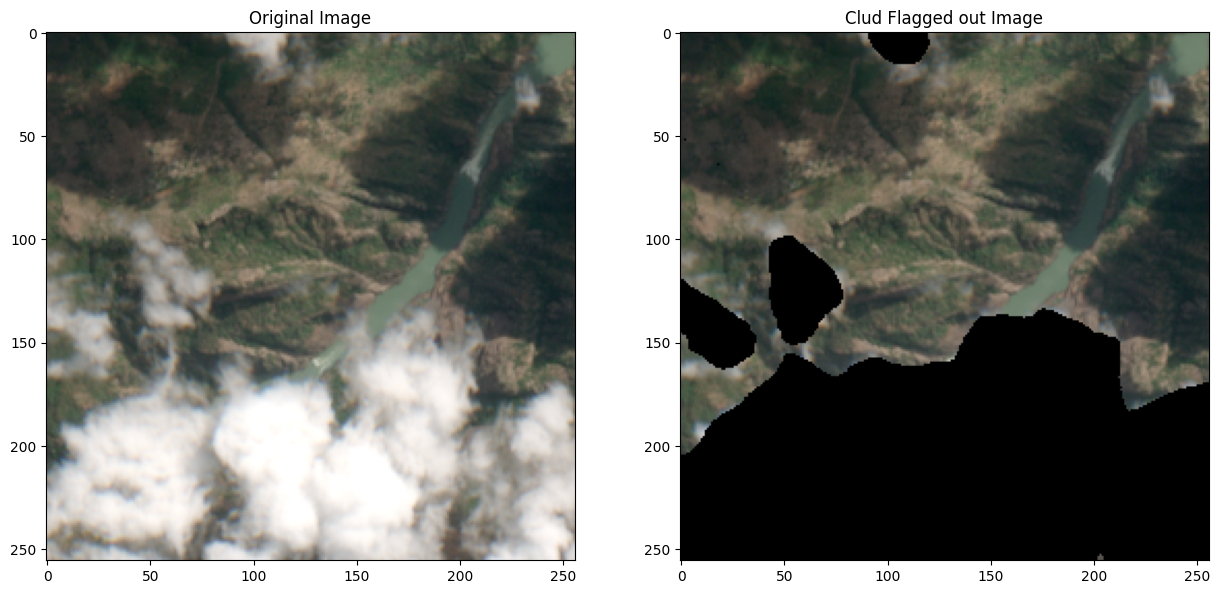

In [37]:
satellite = x_train[2][...,:3]
satellite_hsv = rgb2hsv(satellite)
fig, ax = plt.subplots(1, 2, figsize=(15,12))
# create hsv mask
lower_hmask = satellite_hsv[:,:,0] > 0.3
upper_hmask = satellite_hsv[:,:,0] < 0.8
smask = satellite_hsv[:,:,1] > 0.1
vmask = satellite_hsv[:,:,2] <140
mask_1 = median_filter((lower_hmask+upper_hmask)*smask*vmask, size = 25)

# RGB
red = satellite[:,:,0].astype(np.uint8)
green = satellite[:,:,1].astype(np.uint8)
blue = satellite[:,:,2].astype(np.uint8)
original = np.dstack((red,green,blue))
# segment RGB image
masked_red = red*mask_1
masked_green = green*mask_1
masked_blue = blue*mask_1
satellite_masked = np.dstack((masked_red,masked_green,masked_blue))

ax[0].imshow(original)
ax[0].set_title('Original Image')
ax[1].imshow(satellite_masked)
ax[1].set_title('Clud Flagged out Image')